# Пункт 2 #

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_excel('data/course_data_clean_log.xlsx')
print(df.shape)
df = df.drop_duplicates()
print('После удаления дубликатов:', df.shape)

(1001, 163)
После удаления дубликатов: (969, 163)


**Формирование признаков и целевой переменной**

In [2]:
target = 'log_IC50'
drop_cols = ['IC50, mM', 'CC50, mM', 'SI', 'log_IC50', 'log_CC50', 'log_SI']
X = df.drop(columns=drop_cols, errors='ignore')
y = df[target]

**Разделение данных на обучающую и тестовую выборки**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
results = {}

**Простая линейная регрессия**

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('LinearRegression:')
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

results['LinearRegression'] = {
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
}

LinearRegression:
R2: 0.2804677590983279
MAE: 1.3748363628238869
RMSE: 1.7021039447102135


**Подготовка к обучению регуляризованных моделей и Random Forest**

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)
y_pred = ridge_grid.predict(X_test_scaled)

print('R2 Ridge:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

results['Ridge'] = {
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
}

R2 Ridge: 0.393996031101267
MAE: 1.329938109765726
RMSE: 1.5620634949090113


In [7]:
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=5000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train_scaled, y_train)
y_pred = lasso_grid.predict(X_test_scaled)

print('R2 Lasso:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

results['Lasso'] = {
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
}

R2 Lasso: 0.4156655843434195
MAE: 1.3011595625189418
RMSE: 1.5338810489665378


In [8]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
y_pred = rf_grid.predict(X_test)

print('R2 RF:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

results['RandomForest'] = {
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
}

R2 RF: 0.465755653318072
MAE: 1.1727658996986565
RMSE: 1.4666649603061588


**Сравнение моделей по основным метрикам и визуализация**

C:\Users\Eli\AppData\Local\Temp\ipykernel_892\154262703.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df_results.index, rotation=15)
C:\Users\Eli\AppData\Local\Temp\ipykernel_892\154262703.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df_results.index, rotation=15)
C:\Users\Eli\AppData\Local\Temp\ipykernel_892\154262703.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df_results.index, rotation=15)


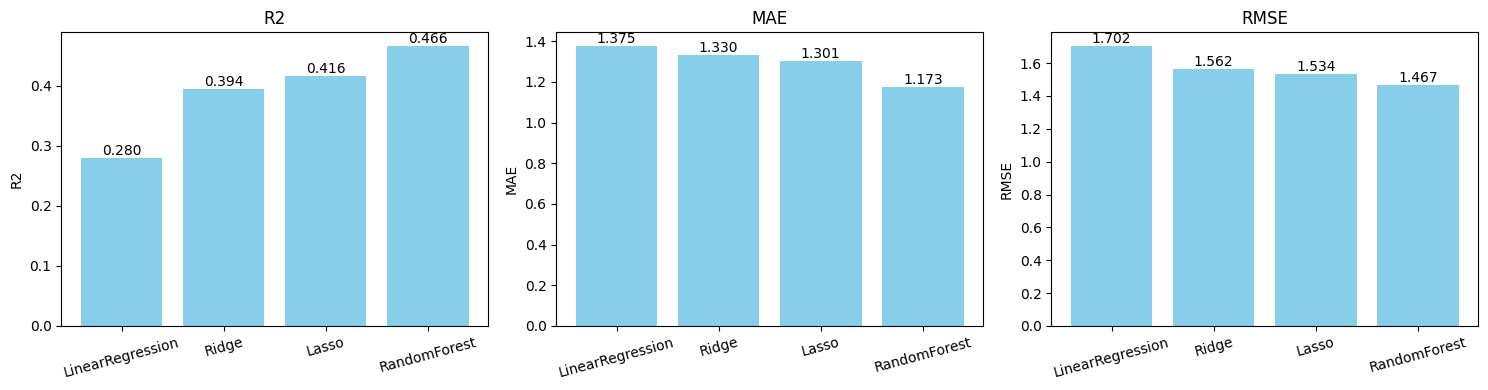

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.DataFrame(results).T  

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
metrics = ['R2', 'MAE', 'RMSE']

for i, metric in enumerate(metrics):
    axes[i].bar(df_results.index, df_results[metric], color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(df_results.index, rotation=15)
    for x, y in enumerate(df_results[metric]):
        axes[i].text(x, y, f"{y:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- **R2 (доля объяснённой дисперсии):**
    - Лучший результат показал Random Forest (`R2 = 0.466`), худший — Linear Regression (`R2 = 0.280`).
    - Линейные модели (Ridge, Lasso) уверенно лучше простой Linear Regression, но уступают ансамблю.

- **MAE (средняя абсолютная ошибка):**
    - Минимальная ошибка у Random Forest (`MAE = 1.173`), максимальная — Linear Regression (`MAE = 1.375`).

- **RMSE (среднеквадратичная ошибка):**
    - Лучшая (наименьшая) ошибка у Random Forest (`RMSE = 1.467`), худшая — Linear Regression (`RMSE = 1.702`).

**Вывод:**
- Random Forest однозначно лучше линейных по всем метрикам, хотя и линейные (особенно Ridge/Lasso) заметно выигрывают у классической линейной регрессии.

**Сохраним модельку для последующего использования**

In [10]:
import joblib

joblib.dump(rf_grid.best_estimator_, 'models/rf_ic50_model.pkl')

['models/rf_ic50_model.pkl']